In [1]:
#!pip install seaborn

## Part 1 ###

#### PROJECT OBJECTIVE: The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog

#### Step 1: Import libraries

In [2]:
import numpy as np
import pandas as pd
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Step 2: Import Data

In [3]:
data=pd.read_csv(os.getcwd()+"\\"+"blogtext.csv\\blogtext.csv")

#### Step 3: Data Exploration

In [4]:
data.shape

(681284, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [6]:
## Checking for any missing data
data.isnull().mean()

id        0.0
gender    0.0
age       0.0
topic     0.0
sign      0.0
date      0.0
text      0.0
dtype: float64

#### Step 3 : Exploratory Analysis

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,681284.0,NaN,NaN,NaN,2397802.403396,1247722.701325,5114.0,1239610.0,2607577.0,3525660.0,4337650.0
gender,681284,2,male,345193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,681284.0,NaN,NaN,NaN,23.932326,7.786009,13.0,17.0,24.0,26.0,48.0
topic,681284,40,indUnk,251015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sign,681284,12,Cancer,65048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,681284,2616,"02,August,2004",16544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,681284,611652,urlLink,445,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

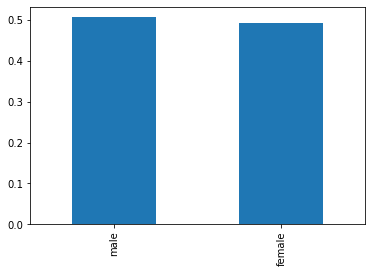

In [8]:
data['gender'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

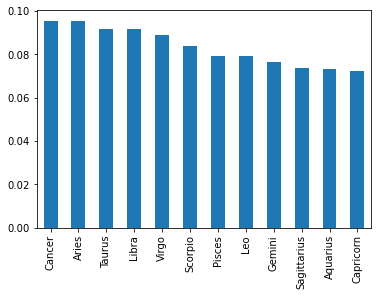

In [9]:
data['sign'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

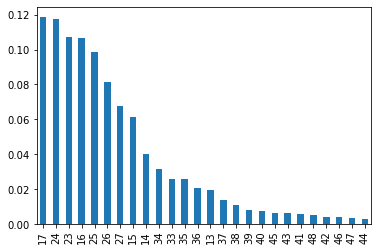

In [10]:
data['age'].value_counts(normalize=True).plot(kind='bar')

In [11]:
data['topic'].value_counts(normalize=True)

indUnk                     0.368444
Student                    0.225901
Technology                 0.061729
Arts                       0.047629
Education                  0.043496
Communications-Media       0.029562
Internet                   0.023494
Non-Profit                 0.021577
Engineering                0.017104
Law                        0.013269
Publishing                 0.011380
Science                    0.010670
Government                 0.010138
Consulting                 0.008604
Religion                   0.007684
Fashion                    0.007120
Marketing                  0.007000
Advertising                0.006864
BusinessServices           0.006605
Banking                    0.005943
Chemicals                  0.005766
Telecommunications         0.005711
Accounting                 0.005625
Military                   0.004591
Museums-Libraries          0.004544
Sports-Recreation          0.004459
HumanResources             0.004418
RealEstate                 0

Summary we do not have enough number of observations for each topics and age

In [12]:
data["age"] = data["age"].astype(str)
data["labels"] = data.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

In [13]:
data_new=data.drop(columns=['id','gender','age','topic','sign','date'], axis=1)    
data_new.head(3)

,text,labels
0,"Info has been found (+/- 100 pages,...","[male, 15, Student, Leo]"
1,These are the team members: Drewe...,"[male, 15, Student, Leo]"
2,In het kader van kernfusie op aarde...,"[male, 15, Student, Leo]"


#### Step 4: Data Processing 

In [14]:
data1=data_new[0:10000] 
data1.labels.values

array([list(['male', '15', 'Student', 'Leo']),
       list(['male', '15', 'Student', 'Leo']),
       list(['male', '15', 'Student', 'Leo']), ...,
       list(['female', '25', 'indUnk', 'Pisces']),
       list(['female', '25', 'indUnk', 'Pisces']),
       list(['female', '25', 'indUnk', 'Pisces'])], dtype=object)

In [15]:
### For multi-label data analysis get label count
label_counts=dict()

for labels in data1.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts

{'male': 5916,
 '15': 602,
 'Student': 1137,
 'Leo': 301,
 '33': 136,
 'InvestmentBanking': 70,
 'Aquarius': 571,
 'female': 4084,
 '14': 212,
 'indUnk': 3287,
 'Aries': 4198,
 '25': 386,
 'Capricorn': 215,
 '17': 1185,
 'Gemini': 150,
 '23': 253,
 'Non-Profit': 71,
 'Cancer': 504,
 'Banking': 16,
 '37': 33,
 'Sagittarius': 1097,
 '26': 234,
 '24': 655,
 'Scorpio': 971,
 '27': 1054,
 'Education': 270,
 '45': 16,
 'Engineering': 127,
 'Libra': 491,
 'Science': 63,
 '34': 553,
 '41': 20,
 'Communications-Media': 99,
 'BusinessServices': 91,
 'Sports-Recreation': 80,
 'Virgo': 236,
 'Taurus': 812,
 'Arts': 45,
 'Pisces': 454,
 '44': 3,
 '16': 440,
 'Internet': 118,
 'Museums-Libraries': 17,
 'Accounting': 4,
 '39': 79,
 '35': 2315,
 'Technology': 2654,
 '36': 1708,
 'Law': 11,
 '46': 7,
 'Consulting': 21,
 'Automotive': 14,
 '42': 14,
 'Religion': 9,
 '13': 42,
 'Fashion': 1622,
 '38': 46,
 '43': 6,
 'Publishing': 4,
 '40': 1,
 'Marketing': 156,
 'LawEnforcement-Security': 10,
 'HumanReso

In [16]:
### nlp processing
import nltk
nltk.download('stopwords') # collection of stopwords in different language. Will be used stop words like is, and etc.
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import string
#get stopwords in english
stop_words=nltk.corpus.stopwords.words('english')+ list(string.punctuation)

def doc_preprocess(doc):
    doc = re.sub(r'[^a-zA-Z\s^\D]', ' ', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    ## tokenize the document
    tokens= nltk.word_tokenize(doc)
    #remove stop words
    wordList=[token for token in tokens if token not in stop_words and not token.isdigit()]
    # re-create document from filtered tokens
    doc = ' '.join(wordList)
    return doc
    
normalize_corpus = np.vectorize(doc_preprocess)

In [18]:
### create corpus
corpus=[]
corpus=data1['text']
corpus = np.array(corpus)
print("Original Corpus:")
print("\n")
corpus[10]

Original Corpus:




"             Ah, the Korean language...it looks so difficult at first, then as you figure out how to read Hanguel (Korea's surprisingly easy-to-learn alphabet of 24 characters) it seems so easy. Then the vocabulary starts. Oh no. Then the backwards (to us) sentence structure.  Yikes!  Luckily there are many options for us slow-witted foreigners to take on the language.  Of course I could list them here but  urlLink this JoongAng article  says a lot and there are more resources  urlLink here .    Well, if you're a guy here is some motivation for you: Jeon Ji Hyun (전지현), the latest 20-something (24, actually) star of movies and CFs (I hear this means Commercial Feature, but not positive).  I saw her latest movie on Sunday night.  It's hard to describe the name...the English version is 'Windstruck' but the Korean version is 여친소 (yeochinso) which is short for 내여자친구를소개합니다 (ne yeojachingu rul sogayhamnida) or 'I'd like to introduce you to my girlfriend'.  Surprisingly, both titles make sens

In [19]:
### clean corpus
norm_corpus = normalize_corpus(corpus)
print("Clean Corpus:")
print("\n")
norm_corpus[10]

Clean Corpus:




"ah korean language ... looks difficult first figure read hanguel korea 's surprisingly easy-to-learn alphabet characters seems easy vocabulary starts oh backwards us sentence structure yikes luckily many options us slow-witted foreigners take language course could list urllink joongang article says lot resources urllink well 're guy motivation jeon ji hyun 전지현 latest -something actually star movies cfs hear means commercial feature positive saw latest movie sunday night 's hard describe name ... english version 'windstruck korean version 여친소 yeochinso short 내여자친구를소개합니다 ne yeojachingu rul sogayhamnida 'd like introduce girlfriend surprisingly titles make sense like website korean english looks quite good actually urllink movie shown theatres subtitles special times info urllink list many theatres seoul click .... urllink urllink great reason learn korean ... n't already married went foreigners well local/korean/national ... course korean take picture ... put urllink movie ... hof/bar u

In [20]:
### Multilabel data processing

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

# Transform between iterable of iterables and a multilabel format
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

##Process output
y = binarizer.fit_transform(data1['labels'])
print("Multilabel counts:",len(label_counts))
print("Targert variable shape:",y.shape)

Multilabel counts: 64
Targert variable shape: (10000, 64)


In [22]:
#Check output variable
y

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

### Step 4 :Feature creations using simple Term frequency - TF
##### Create Features

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv= CountVectorizer(min_df=1, max_df=1, ngram_range=(1,1))
cv_matrix= cv.fit_transform(norm_corpus)
cv_matrix_ar = cv_matrix.toarray()
cv_matrix_ar.shape
vocab = cv.get_feature_names()
cv_matrix_df=pd.DataFrame(cv_matrix_ar, columns=vocab)
cv_matrix_df.head(2)

,000,05,06,075,076,077,078,079,080,081,...,치과,푸하하하,한강,한방삼계탕,형님들의,회식,ｄｅｌｉｃｉｏｕｓ,ｉｎａｃｃｕｒａｔｅだけど,ｉｎｓｐｉｒｅ,ｎｅｖｅｒｍｉｎｄですが
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
## select best features for prediction
from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=500)
X = ch2.fit_transform(cv_matrix_df, y)

In [26]:
X.shape

(10000, 500)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=42,test_size = 0.2, shuffle = True)

In [28]:
print("shape of training set :", X_train.shape)
print("shape of test set :", X_test.shape)

shape of training set : (8000, 500)
shape of test set : (2000, 500)


In [29]:
### Performance 
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score,average_precision_score

In [30]:
# ## Create Performance Matrix
# def display_metrics_micro(Ytest, Ypred):
#     print('Accuracy score: ', accuracy_score(Ytest, Ypred))
#     print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
#     print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
#     print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))

# def display_metrics_macro(Ytest, Ypred):
#     print('Accuracy score: ', accuracy_score(Ytest, Ypred))
#     print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
#     print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),n_jobs=-1))])
LogReg_pipeline.fit(X_train, y_train)

Y_predicted = LogReg_pipeline.predict(X_test)

In [32]:
#!pip install scikit-multilearn

In [33]:
Y_predicted = LogReg_pipeline.predict(X_test)

In [34]:
y_test_df=pd.DataFrame(y_test,columns=label_counts.keys())
y_test_df.head(2)

,male,15,Student,Leo,33,InvestmentBanking,Aquarius,female,14,indUnk,...,13,Fashion,38,43,Publishing,40,Marketing,LawEnforcement-Security,HumanResources,Telecommunications
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [35]:
y_train_df=pd.DataFrame(y_train,columns=label_counts.keys())
y_train_df.head(2)

,male,15,Student,Leo,33,InvestmentBanking,Aquarius,female,14,indUnk,...,13,Fashion,38,43,Publishing,40,Marketing,LawEnforcement-Security,HumanResources,Telecommunications
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [36]:
y_predicted_df=pd.DataFrame(Y_predicted,columns=label_counts.keys())
y_predicted_df['33'].value_counts()

0    2000
Name: 33, dtype: int64

In [37]:
import random 

def print_predicted(Y_predicted, y_test = y_test , n = 10):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(Y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])
print_predicted(Y_predicted=Y_predicted,y_test=y_test, n= 10)

[367, 1351, 1801, 553, 1338, 1124, 141, 1015, 1390, 678]
('male',)
('24', 'Sagittarius', 'female', 'indUnk')
('male',)
('24', 'Sagittarius', 'female', 'indUnk')
('male',)
('35', 'Aries', 'Technology', 'male')
('male',)
('34', 'Sagittarius', 'female', 'indUnk')
('male',)
('15', 'Student', 'Virgo', 'male')
('male',)
('27', 'Taurus', 'female', 'indUnk')
('male',)
('36', 'Aries', 'Fashion', 'male')
('male',)
('17', 'Leo', 'female', 'indUnk')
('male',)
('35', 'Aries', 'Technology', 'male')
('male',)
('35', 'Aries', 'Technology', 'male')


In [38]:
for category in label_counts.keys():
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train_df[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print(display_metrics_weighted(y_test_df[category], prediction))
    print("\n")

**Processing male comments...**
Accuracy score:  0.992
F1 score: weighted 0.9880160642570281
Average precision score: weighted 0.008
Average recall score: weighted 0.992
None


**Processing 15 comments...**
Accuracy score:  0.979
F1 score: weighted 0.9686114199090449
Average precision score: weighted 0.021
Average recall score: weighted 0.979
None


**Processing Student comments...**
Accuracy score:  0.9435
F1 score: weighted 0.9160712631849756
Average precision score: weighted 0.0565
Average recall score: weighted 0.9435
None


**Processing Leo comments...**
Accuracy score:  0.9575
F1 score: weighted 0.9367113665389527
Average precision score: weighted 0.0425
Average recall score: weighted 0.9575
None


**Processing 33 comments...**
Accuracy score:  0.8915
F1 score: weighted 0.8403618821041502
Average precision score: weighted 0.1085
Average recall score: weighted 0.8915
None


**Processing InvestmentBanking comments...**
Accuracy score:  0.9795
F1 score: weighted 0.9693561505430666
A

C:\Users\rajhi\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Accuracy score:  0.9935
F1 score: weighted 0.9902605969400552
Average precision score: weighted 0.0065
Average recall score: weighted 0.9935
None


**Processing Non-Profit comments...**
Accuracy score:  0.994
F1 score: weighted 0.9910090270812437
Average precision score: weighted 0.006
Average recall score: weighted 0.994
None


**Processing Cancer comments...**
Accuracy score:  0.9995
F1 score: weighted 0.999250062515629
Average precision score: weighted 0.0005
Average recall score: weighted 0.9995
None


**Processing Banking comments...**
Accuracy score:  0.996
F1 score: weighted 0.9940040080160322
Average precision score: weighted 0.004
Average recall score: weighted 0.996
None


**Processing 37 comments...**
Accuracy score:  0.9975
F1 score: weighted 0.9962515644555696
Average precision score: weighted 0.0025
Average recall score: weighted 0.9975
None


**Processing Sagittarius comments...**
Accuracy score:  1.0
F1 score: weighted 1.0
Average precision score: weighted nan
Average r

C:\Users\rajhi\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Accuracy score:  1.0
F1 score: weighted 1.0
Average precision score: weighted nan
Average recall score: weighted 1.0
None


**Processing 24 comments...**


C:\Users\rajhi\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Accuracy score:  0.9985
F1 score: weighted 0.9977505629221918
Average precision score: weighted 0.0015
Average recall score: weighted 0.9985
None


**Processing Scorpio comments...**
Accuracy score:  0.9995
F1 score: weighted 0.999250062515629
Average precision score: weighted 0.0005
Average recall score: weighted 0.9995
None


**Processing 27 comments...**
Accuracy score:  0.999
F1 score: weighted 0.9985002501250625
Average precision score: weighted 0.001
Average recall score: weighted 0.999
None


**Processing Education comments...**
Accuracy score:  0.946
F1 score: weighted 0.9197492291880782
Average precision score: weighted 0.054
Average recall score: weighted 0.946
None


**Processing 45 comments...**
Accuracy score:  0.5735
F1 score: weighted 0.4180517953606609
Average precision score: weighted 0.4265
Average recall score: weighted 0.5735
None


**Processing Engineering comments...**
Accuracy score:  0.998
F1 score: weighted 0.997001001001001
Average precision score: weighted 0.

C:\Users\rajhi\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Accuracy score:  0.984
F1 score: weighted 0.9760645161290323
Average precision score: weighted 0.016
Average recall score: weighted 0.984
None


**Processing Internet comments...**
Accuracy score:  0.9905
F1 score: weighted 0.9857726701833711
Average precision score: weighted 0.0095
Average recall score: weighted 0.9905
None


**Processing Museums-Libraries comments...**
Accuracy score:  0.9995
F1 score: weighted 0.999250062515629
Average precision score: weighted 0.0005
Average recall score: weighted 0.9995
None


**Processing Accounting comments...**
Accuracy score:  1.0
F1 score: weighted 1.0
Average precision score: weighted nan
Average recall score: weighted 1.0
None


**Processing 39 comments...**


C:\Users\rajhi\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Accuracy score:  0.9695
F1 score: weighted 0.9544861640010155
Average precision score: weighted 0.0305
Average recall score: weighted 0.9695
None


**Processing 35 comments...**
Accuracy score:  0.9495
F1 score: weighted 0.9249040779687099
Average precision score: weighted 0.0505
Average recall score: weighted 0.9495
None


**Processing Technology comments...**
Accuracy score:  0.989
F1 score: weighted 0.9835304172951232
Average precision score: weighted 0.011
Average recall score: weighted 0.989
None


**Processing 36 comments...**
Accuracy score:  0.9985
F1 score: weighted 0.9977505629221918
Average precision score: weighted 0.0015
Average recall score: weighted 0.9985
None


**Processing Law comments...**
Accuracy score:  0.9935
F1 score: weighted 0.9902605969400552
Average precision score: weighted 0.0065
Average recall score: weighted 0.9935
None


**Processing 46 comments...**
Accuracy score:  0.955
F1 score: weighted 0.9330179028132992
Average precision score: weighted 0.045
Ave

C:\Users\rajhi\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Accuracy score:  0.98
F1 score: weighted 0.9701010101010101
Average precision score: weighted 0.02
Average recall score: weighted 0.98
None


**Processing LawEnforcement-Security comments...**
Accuracy score:  0.598
F1 score: weighted 0.44756445556946184
Average precision score: weighted 0.402
Average recall score: weighted 0.598
None


**Processing HumanResources comments...**
Accuracy score:  0.6775
F1 score: weighted 0.5472503725782415
Average precision score: weighted 0.3225
Average recall score: weighted 0.6775
None


**Processing Telecommunications comments...**
Accuracy score:  0.598
F1 score: weighted 0.44756445556946184
Average precision score: weighted 0.598
Average recall score: weighted 0.598
None




Summary:
1. Model overall shows good performance across labels.
2. most of the labels were imbalanced. f1 score weighted across most of the labeles is good.
3. Model is not performing well on few classes due to limited examples

### Part 2

#### PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following: 

In [39]:
### Step 1: Import library

In [40]:
import nltk
from nltk.chat.util import Chat, reflections
import random
nltk.download('stopwords') # collection of stopwords in different language. Will be used stop words like is, and etc.
nltk.download('punkt')
import string
nltk.download('wordnet')
import warnings
import json
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
# import tensorflow
# tensorflow.__version__

### Step 2: Import corpus

In [44]:
#Read training corpus
with open( "GL Bot.json") as file:
    corpus=json.load(file)

In [45]:
#clean corpus
punct=list(string.punctuation)
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

def corpus_clean(doc):
    doc=doc.lower()
    doc=doc.strip()
     ## tokenize the document
    tokens= nltk.word_tokenize(doc)
    wordList=[token for token in tokens if token not in punct]
    # re-create document from filtered tokens
    filtered_tokens = [token for token in wordList if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc
    
normalize_corpus = np.vectorize(corpus_clean)

In [ ]:
### Get text and tage details

In [46]:
doc_x=[]
doc_y=[]
w_norm=[]
Label=[]
for intent in corpus['intents']:
    for pattern in intent['patterns']:
        corpusar=np.array(pattern)
        w_temp=corpus_clean(pattern)
        w_norm.append(w_temp)
        doc_x.append(pattern)
        doc_y.append(intent['tag'])  

In [47]:
### Create a data frame of text and tag -- with corpus processing
import pandas as pd
d = {'text': w_norm, 'label': doc_y}
dfnorm=pd.DataFrame(d)
dfnorm.head()
dfnorm1=dfnorm[dfnorm['text'] !=""]
print(dfnorm1.head(3))
print("\n")
print("dataframe shape:",dfnorm1.shape)

     text  label
0      hi  Intro
2  anyone  Intro
3   hello  Intro


dataframe shape: (134, 2)


In [48]:
### Create a data frame of text and tag -- without processing
import pandas as pd
d = {'text': doc_x, 'label': doc_y}
df=pd.DataFrame(d)
df.head()
df1=df[df['text'] !=""]
print(df1.head(3))
print("\n")
print("dataframe shape:",df1.shape)

              text  label
0               hi  Intro
1      how are you  Intro
2  is anyone there  Intro


dataframe shape: (138, 2)


In [49]:
## Checking data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    138 non-null    object
 1   label   138 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [50]:
df1.isnull().sum()

text     0
label    0
dtype: int64

In [51]:
dfnorm1['label'].value_counts('normalize')

SL         0.216418
NN         0.179104
Intro      0.149254
Exit       0.126866
Olympus    0.097015
Ticket     0.082090
Profane    0.067164
Bot        0.052239
Other      0.029851
Name: label, dtype: float64

In [ ]:
### Step3 : Featurisation

In [ ]:
## TF

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(min_df=1, max_df=1.0, ngram_range=(1,1))
cv_matrix= cv.fit_transform(dfnorm1['text'])
cv_matrix_ar = cv_matrix.toarray()
cv_matrix_ar.shape
vocab = cv.get_feature_names()
cv_matrix_df=pd.DataFrame(cv_matrix_ar, columns=vocab)
cv_matrix_df.head(2)

,able,access,activation,ada,adam,afternoon,aifl,aiml,ann,anyone,...,validation,visible,wasted,weights,whats,window,working,works,ya,yo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### TF-IDF Model

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(dfnorm1['text'])
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
tv_matrix_df=pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
tv_matrix_df.head(2)

,able,access,activation,ada,adam,afternoon,aifl,aiml,ann,anyone,...,validation,visible,wasted,weights,whats,window,working,works,ya,yo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
### Key word list 
link_list=set(['deep','learning', 'svm', 'ada','boosting','machine','neural', 'nets','artificial','intelligence','activation',
              'logistic', 'regression','ensemble','knn','imputer','cross','validation','random','forest','gradient','supervised',
               'classification','naive','bayes','bagging','hyper','parameter','activation','function','softmax','sigmoid','relu',
               'otimizer','epoch','forward', 'propagation','backward','sgd'
              ])

In [ ]:
### Processing Labels

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(dfnorm1['label'])
y.shape
#Use keras.utils.to_categorical function for labels
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y,num_classes=9)

(134,)

In [59]:
y.shape

(134,)

In [ ]:
# y_train[0]

In [ ]:
### Modelling

In [60]:
### feature selection
## select best features for prediction
from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=50)
X = ch2.fit_transform(tv_matrix, y)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(tv_matrix)
principalComponents.shape
print(tv_matrix[4])
print(principalComponents[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-6.82487773e-002 -8.18801358e-005 -6.15890308e-002  9.43046283e-003
 -2.58581688e-002 -4.08762562e-003 -6.53660438e-002 -5.50482140e-003
 -9.23243452e-003 -3.64657591e-002 -1.19968730e-002 -2.80114342e-002
 -7.45852418e-003  5.90962435e-003 -1.38308141e-002 -2.39885297e-021
  1.92291495e-003  7.31350741e-003 -3.81407474e-002  3.12836419e-002
 -1.49699943e-002 -8.88953379e-016  1.13498762e-002  4.38700618e-002
 -4.55373929e-002  2.63490938e-002 -4.30613138e-002 -3.39120187e-002
 -3.91323365e-002  1.59357128e-002 -8.78976211e-003 -1.03988826e-022
  9.93025673e-002 

In [62]:
### Logistic Model for classification
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(class_weight='balanced')
model_log.fit(X, y)

LogisticRegression(class_weight='balanced')

In [63]:
# prediction 
y_pred = model_log.predict(X)
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y, y_pred)
ac

0.7089552238805971

In [64]:
### with PCA
### Logistic Model for classification
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(class_weight='balanced')
model_log.fit(principalComponents, y)

LogisticRegression(class_weight='balanced')

In [65]:
# prediction 
y_pred = model_log.predict(principalComponents)
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y, y_pred)
ac

0.9850746268656716

### *** Bot **

In [66]:
### Input Data processing
def text_preprocess(inp):
    doc=inp
    norm_input=[]
    norm_input = normalize_corpus(inp)
    input_matrix = tv.transform(norm_input).toarray()
    input_select = pca.transform(input_matrix)
#     input_select=ch2.transform(input_matrix)
    input_matrix_ar = input_select
    
    
#     print(input_matrix_ar)
    return input_matrix_ar

In [67]:
def chat():
    print("Hello I am Jason Bot!")
    print("Would you like any assistance related to Great Learning Olympus, Neural Network and Machine learning.")
    print("Note:I do understand English if written in lowerase")
    print("If answer is not right( type:*)")
    while True:
        inp=input("\n\nYou:")
        if inp.lower()=="*":
            print("Jason Bot: Please rephrase your question and Try again")
        if inp.lower()=='quit':
            break
        
        inp_proc=text_preprocess([inp])
        results_pred=model_log.predict(inp_proc)
        results=le.inverse_transform(results_pred)
        
        for tg in corpus['intents']:
            if tg['tag']==results:
                if tg['tag'] in ['SL','NN']:
                    tokens_a1= set(nltk.word_tokenize(inp))
                    filtered_tokens1 = list([token for token in tokens_a1 if token not in stop_words])
                    check_list= link_list.intersection(filtered_tokens1)
                    check_list=sorted(list(check_list))
                    search_word = '_'.join(check_list) 
                    if search_word=='':
                        print("Please refer following link")
                        print('https://www.google.com/search?q='+filtered_tokens1[0])
                        print("If answer is not right( type:*)")
                    elif search_word !='':
                        print("Please refer following link")
                        responses=['https://en.wikipedia.org/wiki/'+search_word] 
                        print("If answer is not right( type:*)")
                else:
                    responses=tg['responses']
                
        print(random.choice(responses))
                

In [69]:
#initiate the conversation
if __name__ == "__main__":
    chat()

Hello I am Jason Bot!
Would you like any assistance related to Great Learning Olympus, Neural Network and Machine learning.
Note:I do understand English if written in lowerase
If answer is not right( type:*)


You:hi
Hello! how can i help you ?


You:help me with olympus
Link: LMS Login GreatLearning @ https://olympus.greatlearning.in


You:what  is machine learning
Please refer following link
If answer is not right( type:*)
https://en.wikipedia.org/wiki/learning_machine


You:what is ann
Please refer following link
https://www.google.com/search?q=ann
If answer is not right( type:*)
https://en.wikipedia.org/wiki/learning_machine


You:*
Jason Bot: Please rephrase your question and Try again
Hello! how can i help you ?


You:transfer request 
Tarnsferring the request to your PM


You:silly bot
Tarnsferring the request to your PM


You:jerk
Please use respectful words


You:thank you
I hope I was able to assist you, Good Bye


You:quit
